# **Inspect S1 Time-Series for Area of Interest**

Authors: 
- Victor Tang
- Marcos Kavlin

Reviewed/Edited by:
- Marcos Kavlin
- Dr. Andrew Dean

### Purpose

This notebook is the first step in the Wetland Function Assessment Tutorial.
The goal of this notebook is to show you, the user, how to inspect Sentinel 1 time series for an area of interest.
This will be done as part of a series of Notebooks, designed to walk you through the steps involved in assessing Wetland Function through time.


### Workflow

1. Import necessary packages.
2. Define a normalization function for your S1 imagery.
3. Open the S1 imagery, apply the normalization, and visualize the time series.

### Notes

The composites that were used run this notebook are placeholders used to demonstrate this workflow. The data required to run the steps demonstrated in this notebook are 10 day Sentinel 1 median composites. In this example the images were produced for the year 2022. The images were grouped into 10 day composites as that was most conducive to a complete year-long time series, while still removing speckle and noise.

## 1. Import necessary packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
from tqdm.notebook import tqdm

import xarray as xr
import rioxarray as rxr

import xrspatial.multispectral as ms

base_dir = f'{directory_with_S1_composites}'

## 2. Create a normalization function

In this step we create a function to normalize our S1 images to ensure that they can be accurately compared.

In [ ]:
def normalize(val, lower=.1, upper=99.9):
    vmin = np.nanpercentile(val, lower)
    vmax = np.nanpercentile(val, upper)
    val2 = val.copy()
    val2[val2 < vmin] = vmin
    val2[val2 > vmax] = vmax
    val2 = (val2 - vmin) / (vmax - vmin)
    return val2

## 3. Open S1 images, apply the normalization function, and visualize the imagery

The following two cells focus on the following steps:

- List the images in the directory of interest that we wish to normalize
- Open each image using rioxarray
- Using the vv and vh bands of each image calculate the vv/vh index
- Apply the normalization function we defined in the previous section to each band
- Plot our normalized False-Color Composites, in a sequential fashion.

In [ ]:
fpath_list = glob.glob(base_dir + '/*.tif'.format(target_year))

  0%|          | 0/36 [00:00<?, ?it/s]

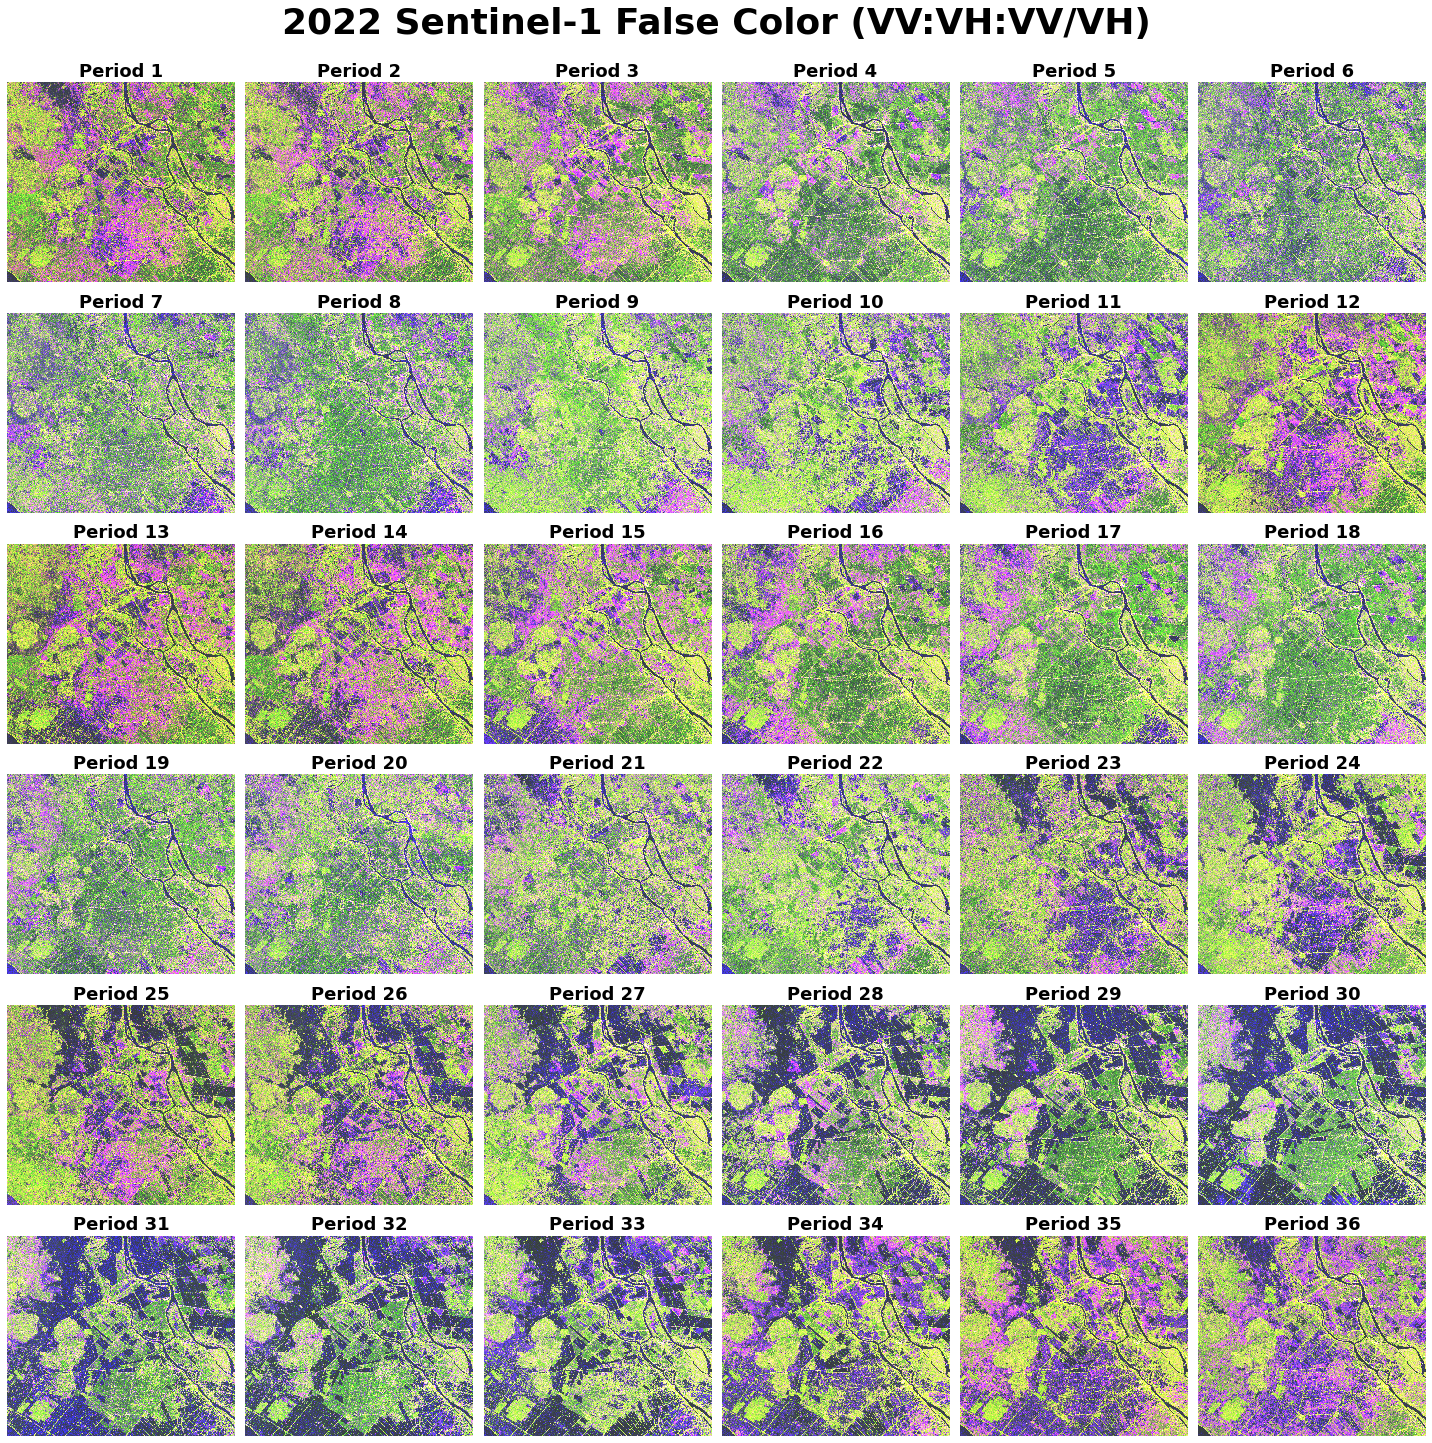

In [4]:
fpath_list = fpath_list[:36]

fig, axes = plt.subplots(6, 6, figsize=[20, 20], facecolor='white')
axes = axes.ravel()

for fpath in tqdm(fpath_list):

    i = int(fpath.split('_')[-1].split('.')[0])

    da = rxr.open_rasterio(fpath).assign_coords(band=['vh', 'vv'])

    vv = da.sel(band='vv')
    vh = da.sel(band='vh')
    rvh = vv / vh
    
    vv.values = normalize(vv.values, 1, 99)
    vh.values = normalize(vh.values, 1, 99)
    rvh.values = normalize(rvh.values, 1, 99)

    img = ms.true_color(r=vv, g=vh, b=rvh, nodata=np.nan,)

    ax = axes[i - 1]
    img.plot.imshow(ax=ax)
    ax.set_title('Period {}'.format(i), fontsize=18, fontweight='bold')
    ax.set_axis_off()

fig.suptitle(
    '{} Sentinel-1 False Color (VV:VH:VV/VH)'.format(target_year),
    fontsize=36, fontweight='bold', y=1.,
)
fig.tight_layout()